# 1 Exercise 1c

## 1.1 Newsvendor Problem holding cost sensitivity
This notebook contains the plot of exercise 1c. From 1a and b we know that the optimal solution of the Newsvendor Problem is at $F^{-1}_{Y}(\frac{\tilde{p}}{\tilde{p} + \tilde{c}}) = F^{-1}_Y(\frac{p - c}{p + c_h})$. In this notebook we graph the impact of a holding cost.

## 1.2 Import dependencies



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

## 1.3 Auxiliary Functions



In [7]:
def inverse_normal_cdf(percentile: float, location: float, scale: float) -> float:
    return sts.norm.ppf(percentile, loc=location, scale=scale) # Return the inverse cdf of a normal distribution

Function to calculate optimal quantity. Note that $F^{-1}_{Y}(\frac{\tilde{p}}{\tilde{p} + \tilde{c}}) = F^{-1}_Y(\frac{p - c}{p + c_h})$.

In [8]:
def calculate_optimal_quantity(cost: float, price: float, holding_cost: float, location: float, scale: float) -> float:
    percentile = (price - cost)/(price + holding_cost)
    return inverse_normal_cdf(percentile, location, scale)

## 1.4 Sensitivity analysis

For the sensitivity analysis we assume that the demand is $N(100, 10)$ distributed. We set $p = 1.5$, $c = 1$, and draw the graph for the values $c_h \in [-0.9, 5]$. Note that a negative holding cost could be seen as the price for which you can sell left overs (e.g. old news papers can be sold to collectors).

In [11]:
def main():
    points: float = 10000
    cost: float = 1.0
    price: float = 1.5
    location: float = 100.0
    scale: float = 10.0

    holding_cost_left_boundry: float = -1
    holding_cost_right_boundry: float = 5.0

    holding_cost_vector: np.ndarray = np.linspace(holding_cost_left_boundry, holding_cost_right_boundry, num=points)
    optimal_quantity_vector: np.ndarray = np.empty(points)

    for i, holding_cost in enumerate(holding_cost_vector):
        optimal_quantity_vector[i] = calculate_optimal_quantity(cost, price, holding_cost, location, scale)

    plt.plot(holding_cost_vector, optimal_quantity_vector, lw=1)
    plt.grid(True)
    plt.style.use('seaborn-whitegrid')
    plt.title("Holding cost sensitivity")
    plt.xlabel("$c_h$", loc="right")
    plt.ylabel("$Q^*(F_Y; \\tilde{c}, \\tilde{p})$", loc="top")
    plt.show()

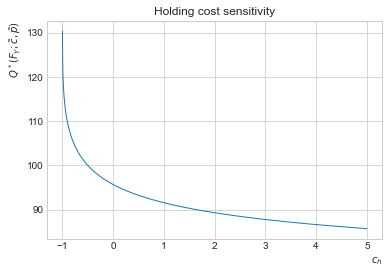

In [12]:
main()